#  <center>DIAMOND PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv("diamonds.csv.zip")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### DROPPING THE UNNAMED:0 COLUMNS AS IT IS HAVING NO IMPORTANCE

In [6]:
data.drop(columns='Unnamed: 0', inplace=True)

In [7]:
data.shape

(53940, 10)

In [8]:
data.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [9]:
data.duplicated().sum()

146

In [10]:
data.drop_duplicates(inplace=True)

## UNIVARIATE ANALYSIS

## HISTOGRAM 

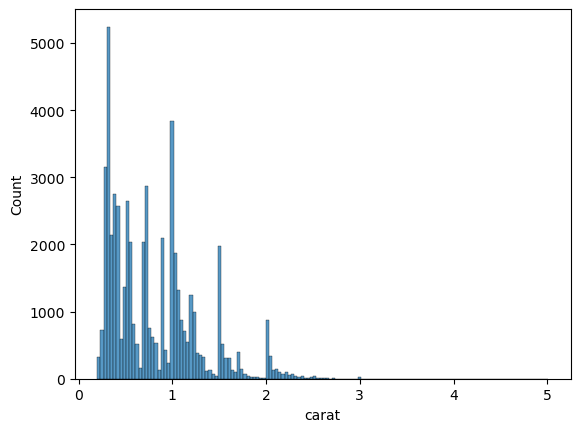

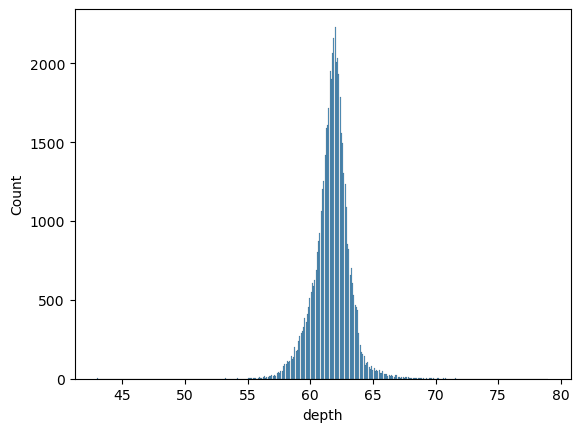

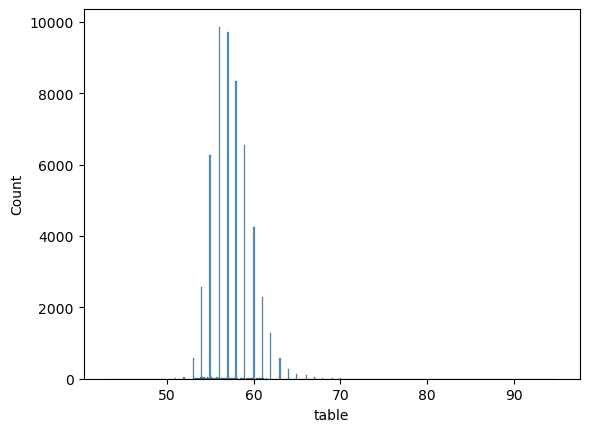

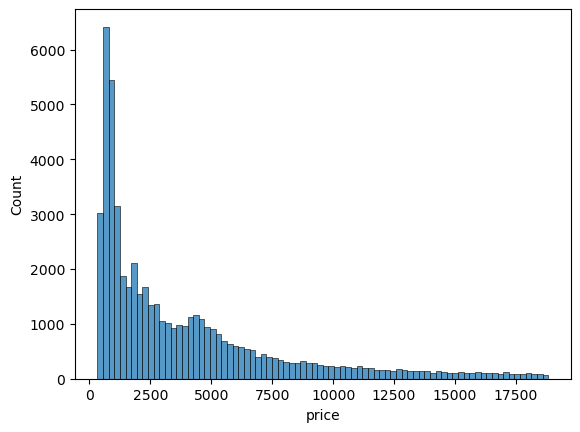

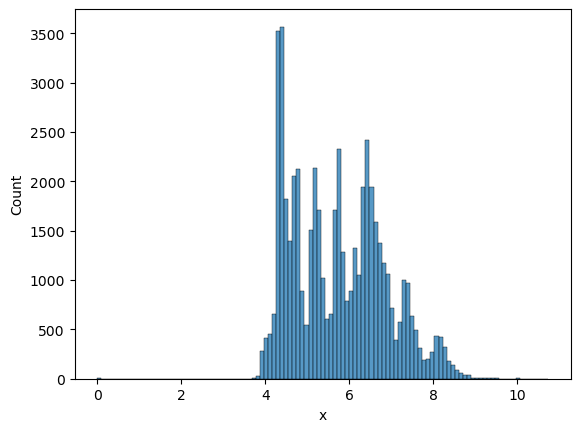

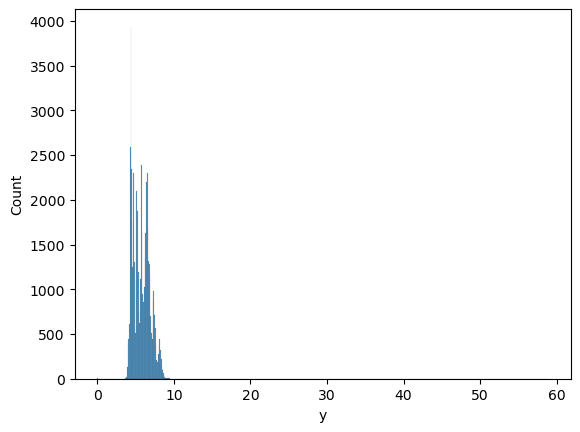

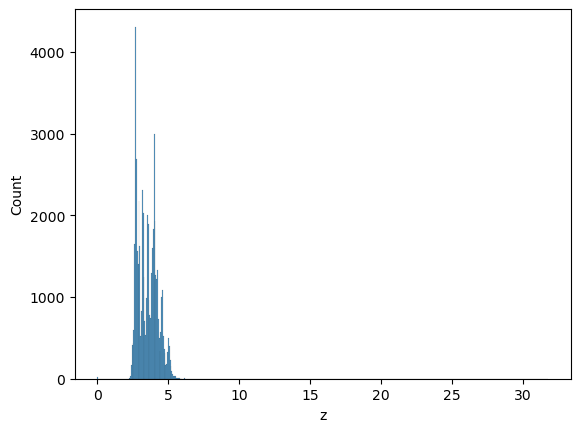

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x =data[i] )
        plt.show()

## KDE PLOT

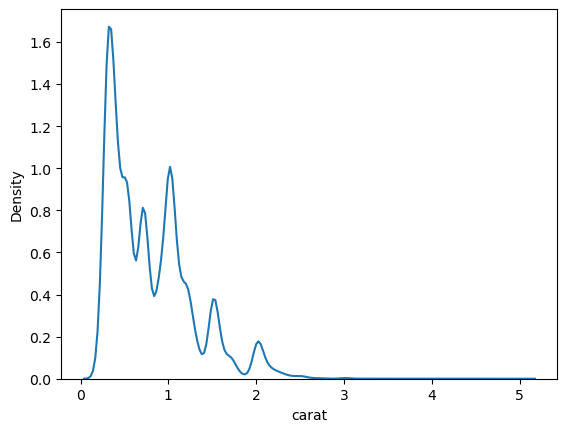

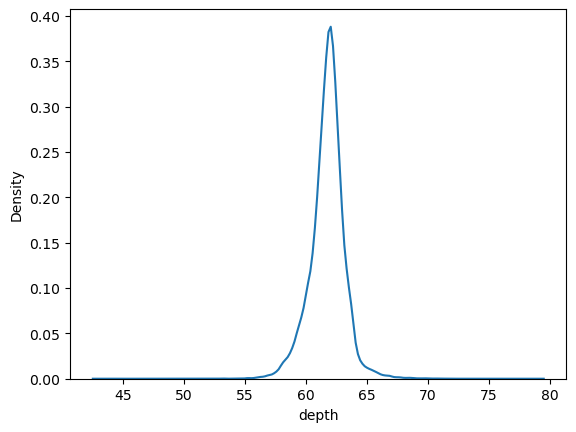

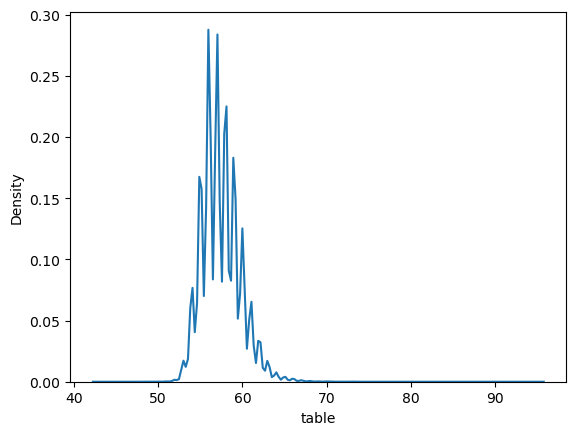

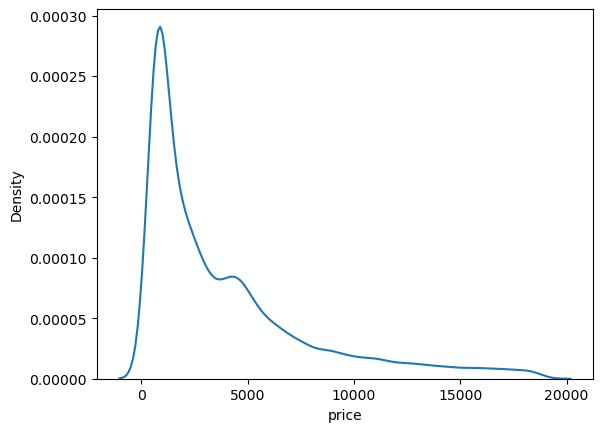

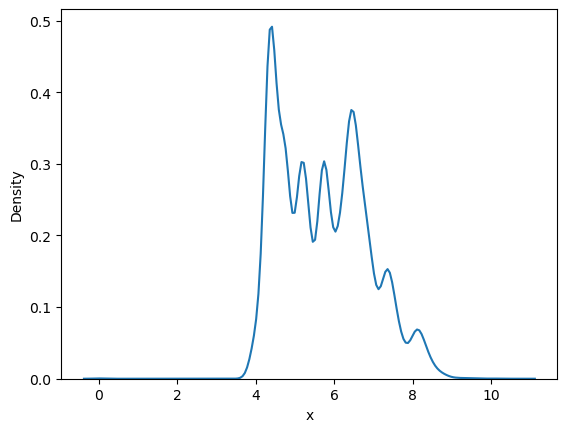

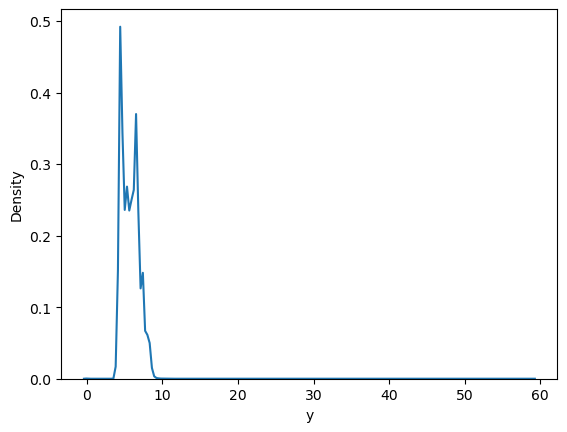

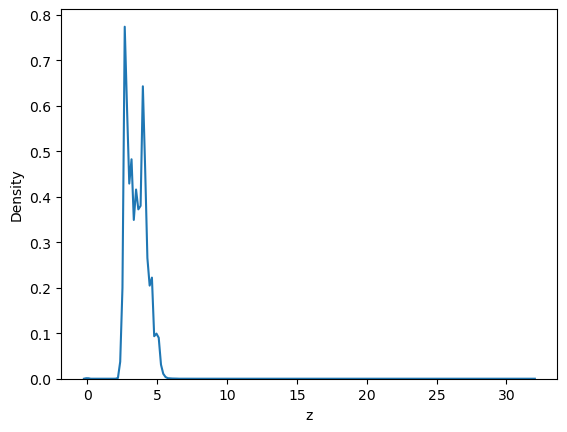

In [12]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i] )
        plt.show()

## BOX PLOT

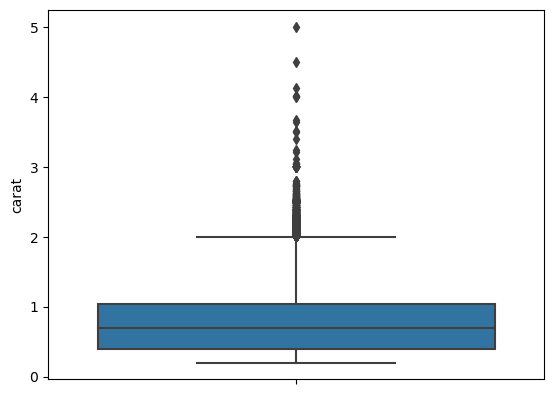

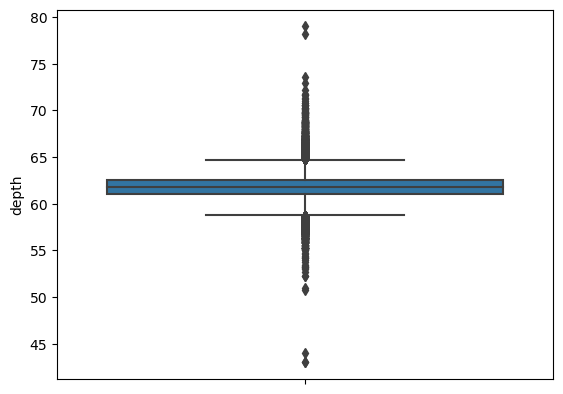

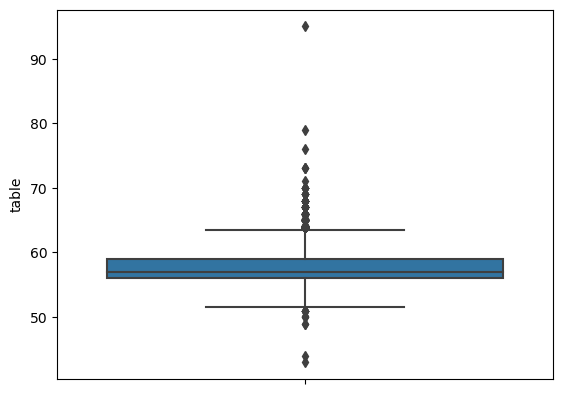

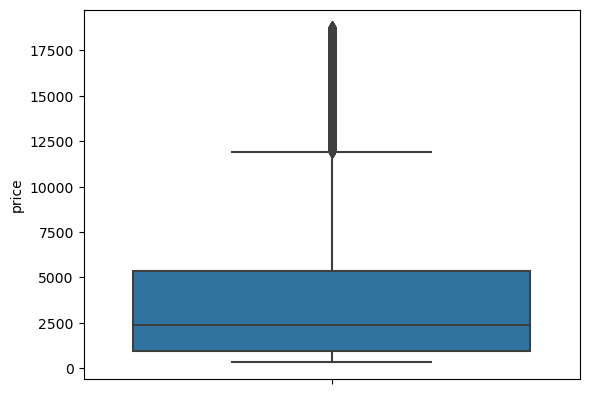

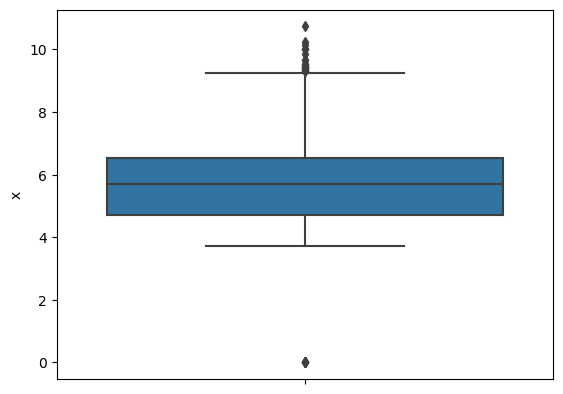

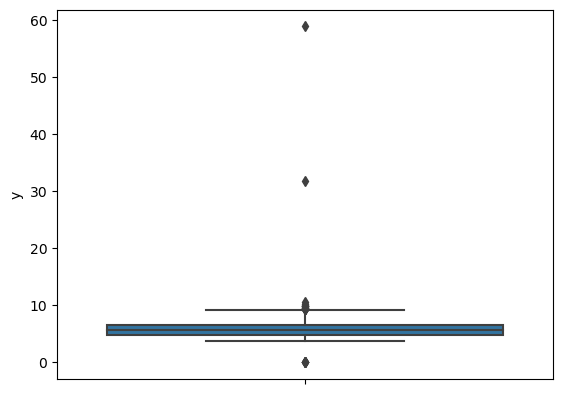

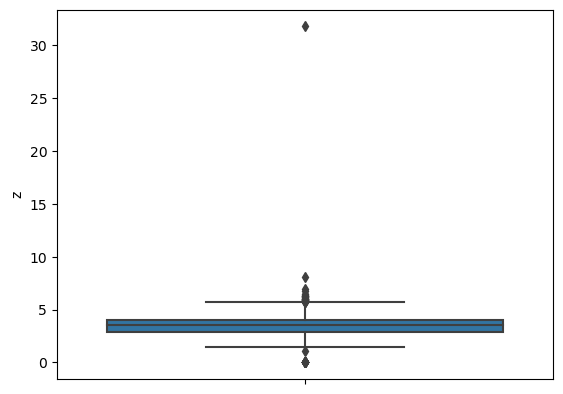

In [13]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y =data[i])
        plt.show();

## SUB PLOT

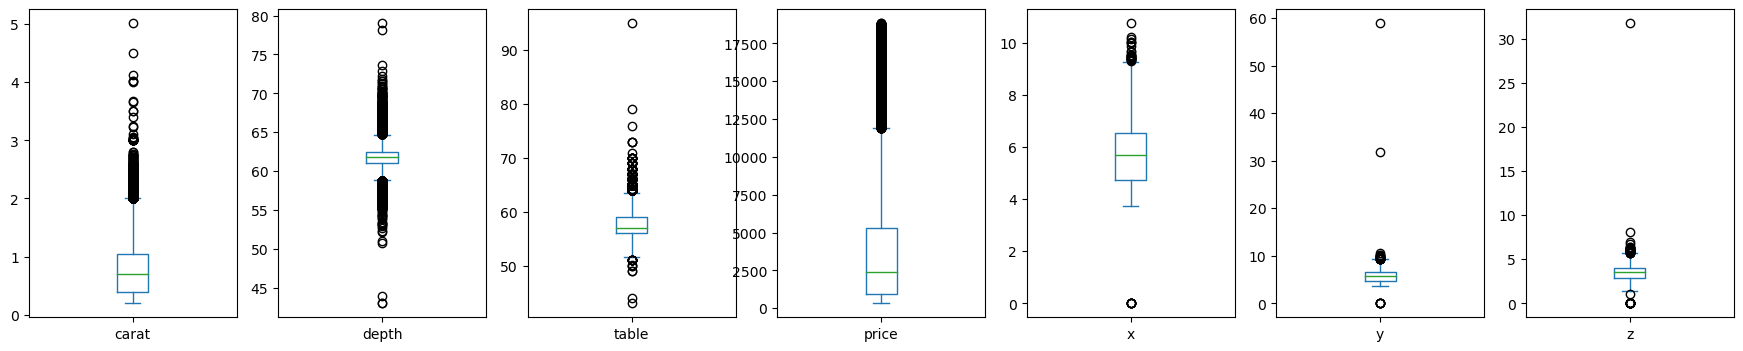

In [14]:
data.plot.box(figsize=(22,4),subplots=True);

## PAIR PLOT

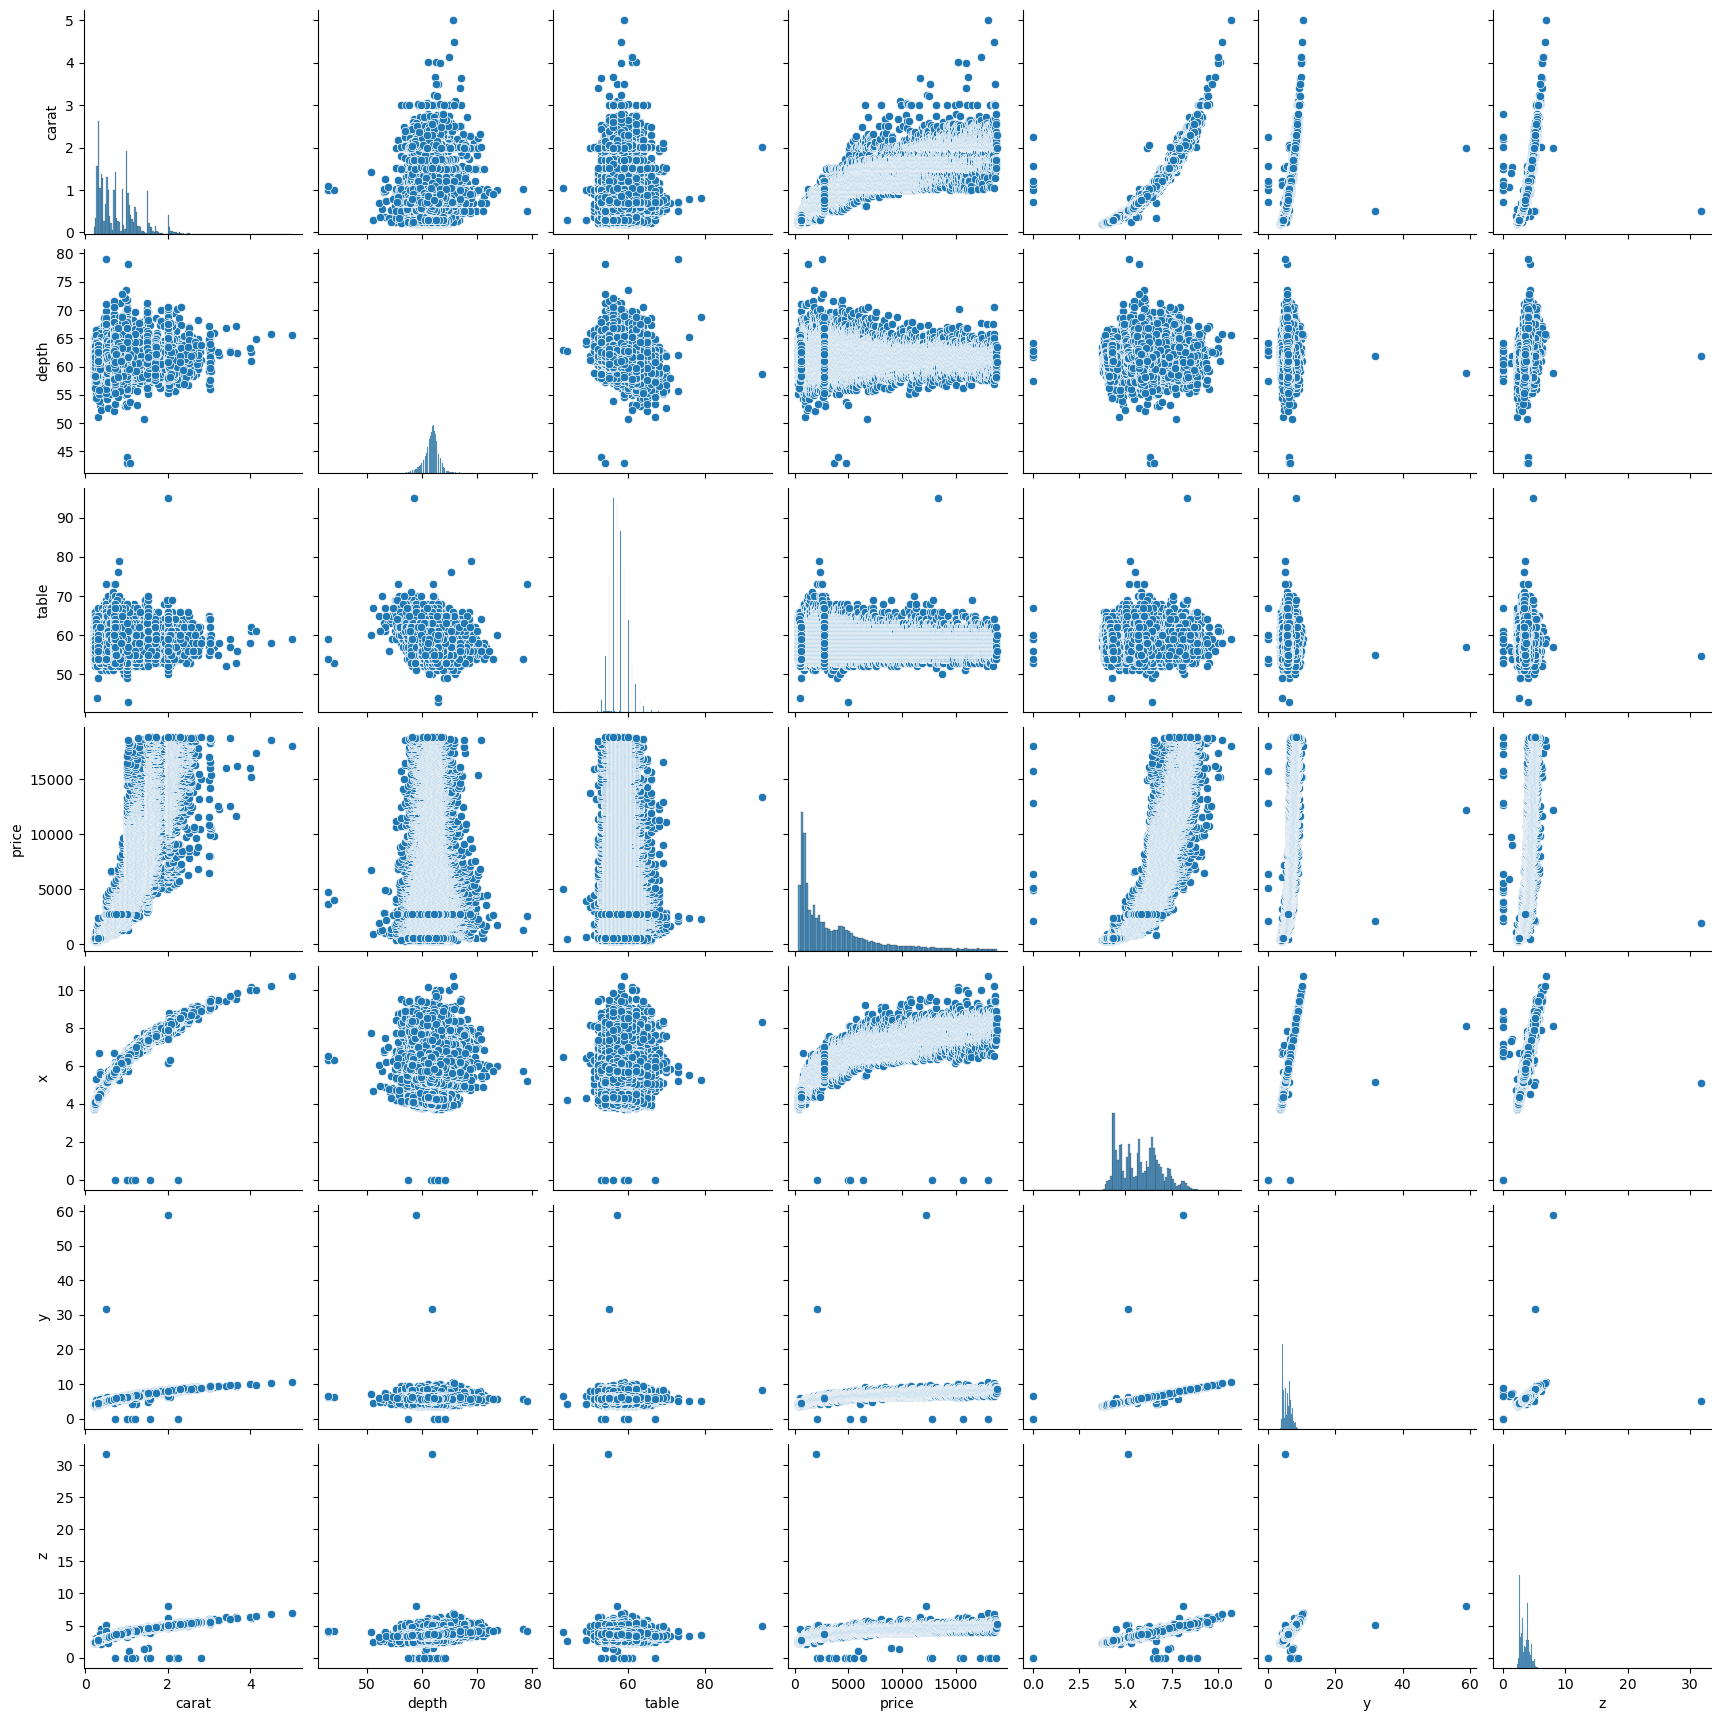

In [15]:
sns.pairplot(data=data)
plt.show()

## MULTI VARIATE ANALYSIS

In [16]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## BAR PLOT

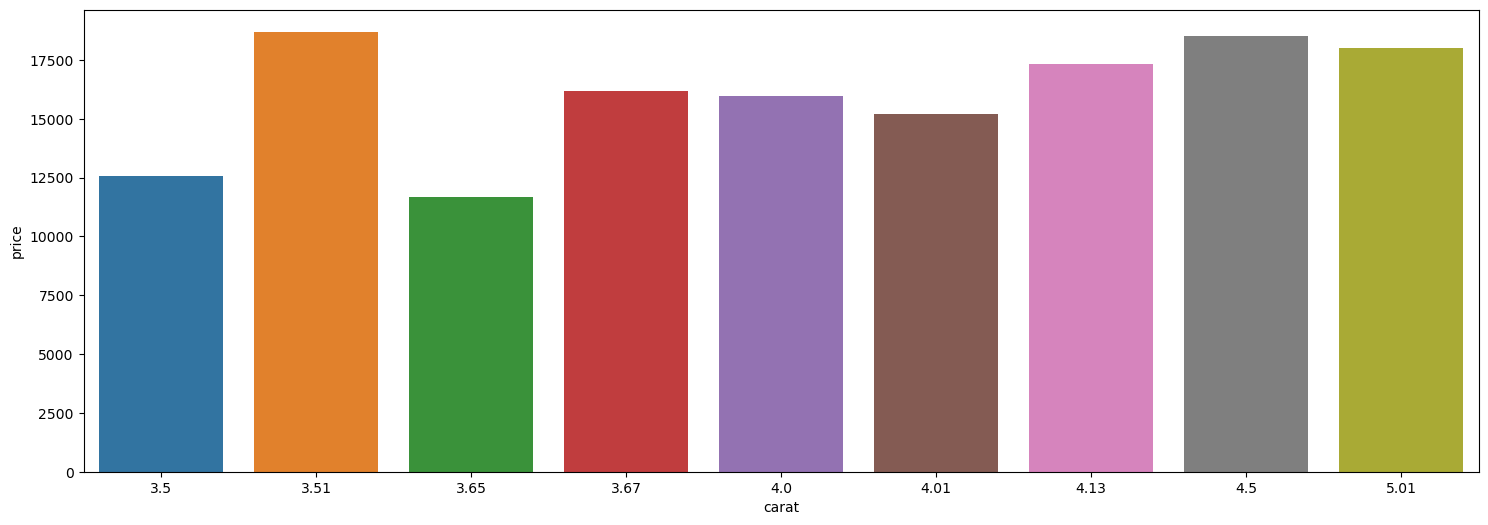

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(x='carat', y='price', data=data.sort_values(by='carat',ascending=False)[:10]);

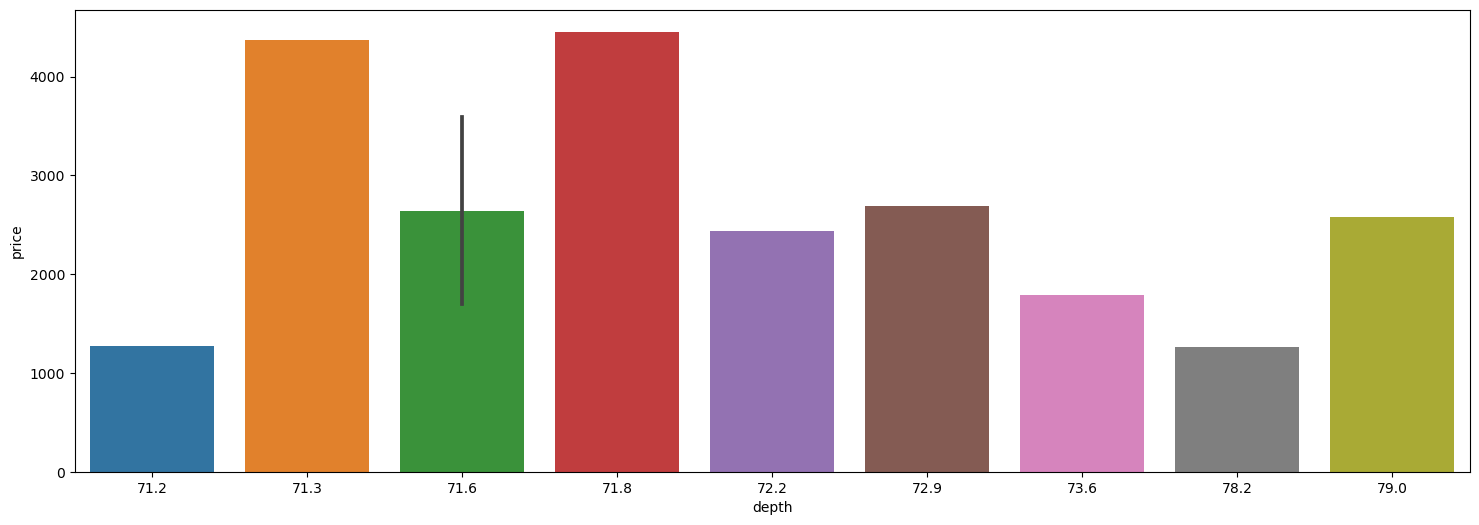

In [18]:
plt.figure(figsize=(18,6))
sns.barplot(x='depth', y='price', data=data.sort_values(by='depth',ascending=False)[:10]);

## LINE CHART

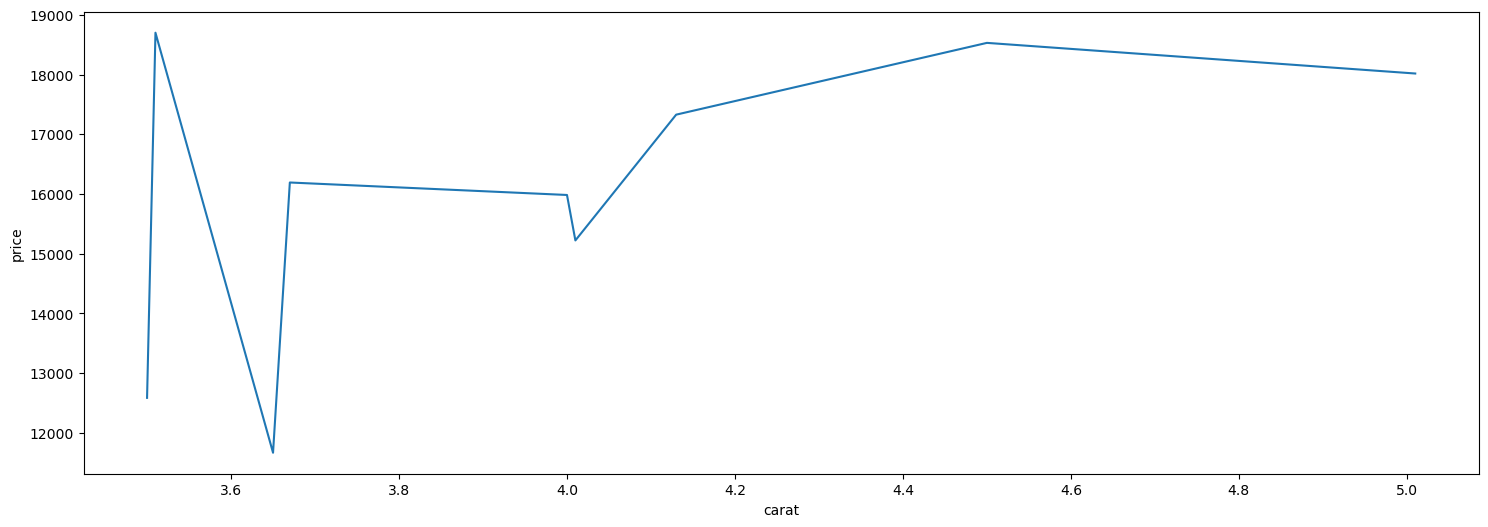

In [19]:
plt.figure(figsize=(18,6))
sns.lineplot(x='carat', y='price', data=data.sort_values(by='carat',ascending=False)[:10]);

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.5+ MB


## OUTLIER TREATMENT

In [21]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [22]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])


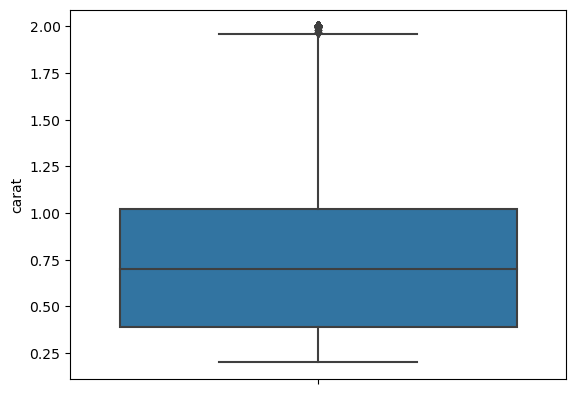

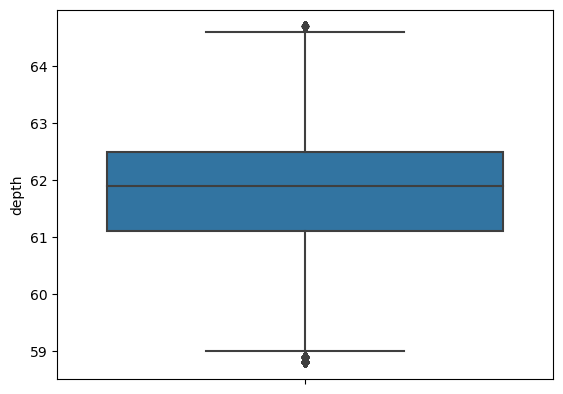

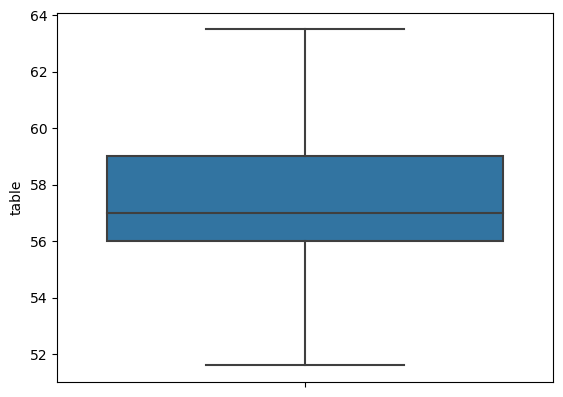

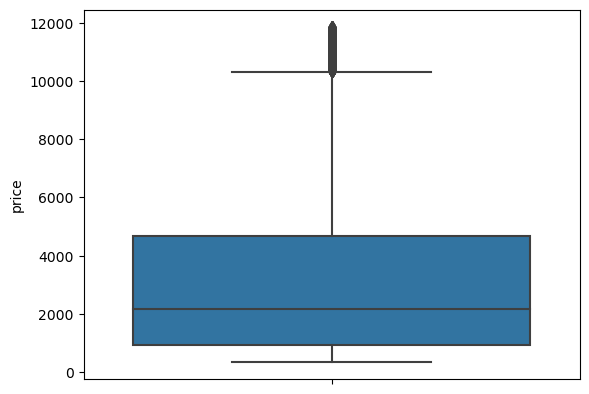

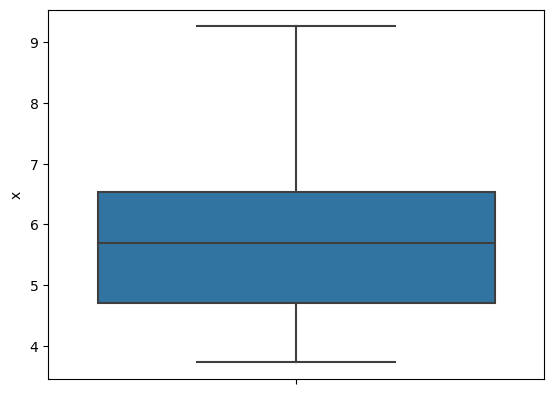

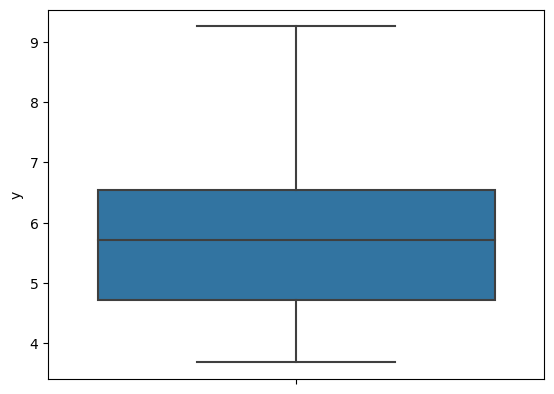

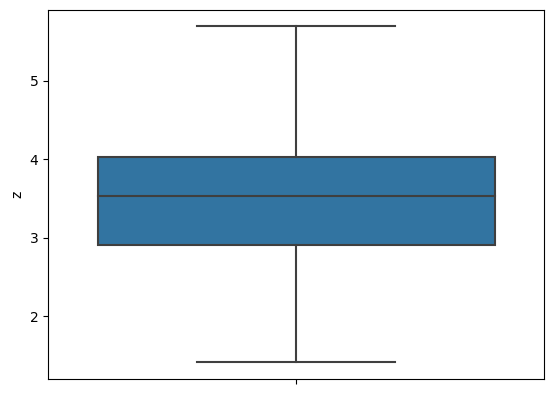

In [23]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show();

### LABEL ENCODING THE CATEGORICAL COLUMN

In [24]:
cols=["cut","color","clarity"]
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)

In [25]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51921 non-null  float64
 1   cut      53794 non-null  int32  
 2   color    53794 non-null  int32  
 3   clarity  53794 non-null  int32  
 4   depth    51269 non-null  float64
 5   table    53190 non-null  float64
 6   price    50271 non-null  float64
 7   x        53763 non-null  float64
 8   y        53766 non-null  float64
 9   z        53746 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 5.9 MB


In [27]:
data.dropna(inplace=True)

In [28]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### CHECKING THE CORRELATION WITH THE TARGET

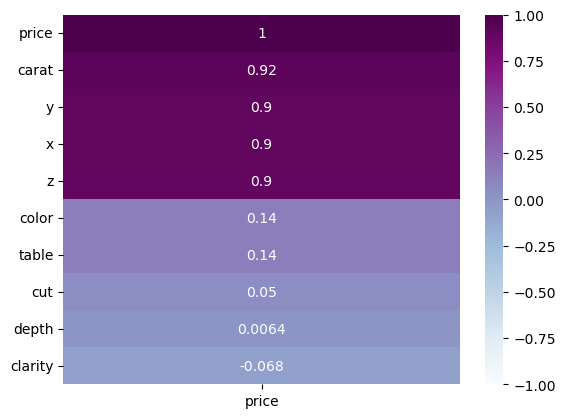

In [29]:
sns.heatmap(data.corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap="BuPu");

In [30]:
x=data[["y","carat","x","z"]].values
y=data[["price"]].values

## FEATURE SCALING

In [31]:
sc = StandardScaler()

In [32]:
x=sc.fit_transform(x)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## CROSS VALIDATION

In [34]:
models={
       'LinearRegression':LinearRegression(),
       "Ridge":Ridge(),
      "LinearSVR":LinearSVR(),
      "DecisionTreeRegressor":DecisionTreeRegressor(),
      "GradientBoostingRegressor":GradientBoostingRegressor(),
      "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name,model in models.items():
    scores=cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 949.740353196541
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 949.7571641517058
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 949.6420073082202
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 1350.4862392888258
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 1032.0547701044884
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 1133.2868411390518
****************************************************************

## MODEL BUILDING

In [36]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=model.predict(x)

### PREDICTING Y

In [39]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,326.0,341.388199
1,326.0,203.164865
2,334.0,542.645392
3,335.0,455.116691
4,336.0,321.404602


## SCATTER PLOT

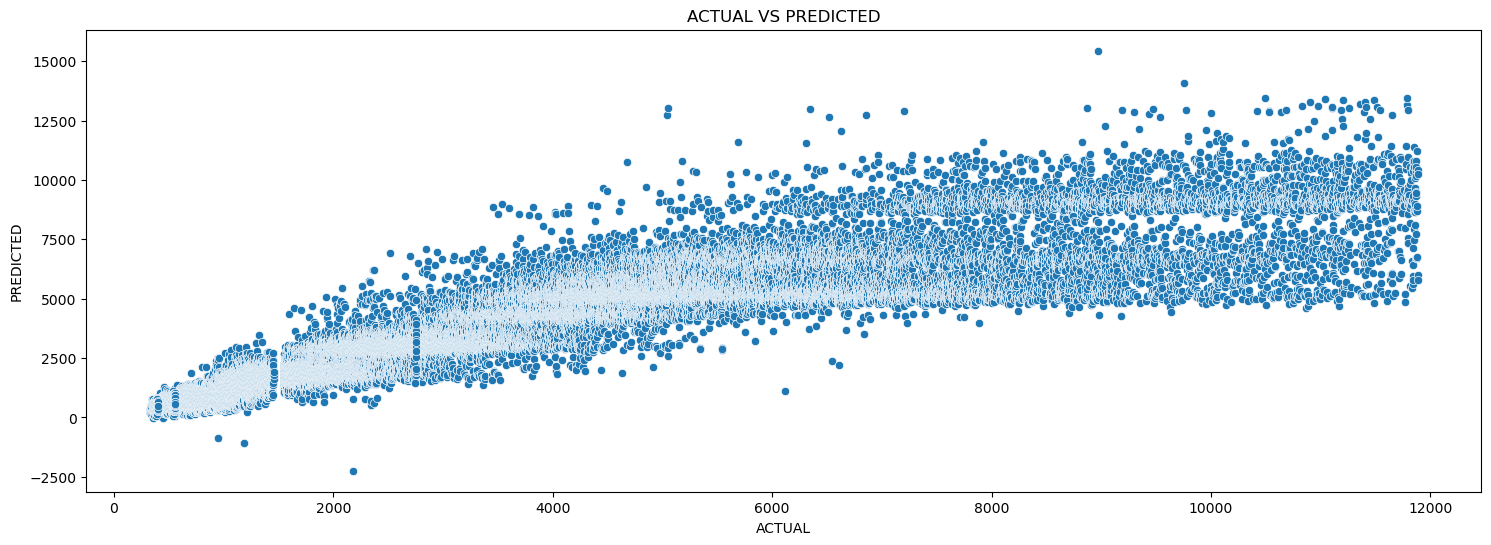

In [40]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");